# Pulsar Data

## Contents

### Reading and displaying the file

In [1]:
# Importing pandas
import pandas as pd

file = pd.read_csv('pulsar_data_train.csv')
file.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


### Number of rows and columns

In [2]:
file.shape

(12528, 9)

### Column names

In [3]:
file.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

### Fixing column names

In [4]:
# Assigning easier column names 
file.columns = ['Mean_IP', 'SD_IP', 'ExcessKurtosis_IP', 'Skewness_IP','Mean_DM-SNR',
                'SD_DM-SNR', 'ExcessKurtosis_DM-SNR', 'Skewness_DM-SNR', 'TargetClass'] 

### Looking at null values and datatypes

In [5]:
# Datatypes of each column
file.dtypes

Mean_IP                  float64
SD_IP                    float64
ExcessKurtosis_IP        float64
Skewness_IP              float64
Mean_DM-SNR              float64
SD_DM-SNR                float64
ExcessKurtosis_DM-SNR    float64
Skewness_DM-SNR          float64
TargetClass              float64
dtype: object

In [6]:
# Number of NULL values in each column
file.isnull().sum()

Mean_IP                     0
SD_IP                       0
ExcessKurtosis_IP        1735
Skewness_IP                 0
Mean_DM-SNR                 0
SD_DM-SNR                1178
ExcessKurtosis_DM-SNR       0
Skewness_DM-SNR           625
TargetClass                 0
dtype: int64

# Exploratory Data Analysis

In [7]:
# Importing all the libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as rn
import warnings
warnings.filterwarnings('ignore')

### Looking at the correlation map

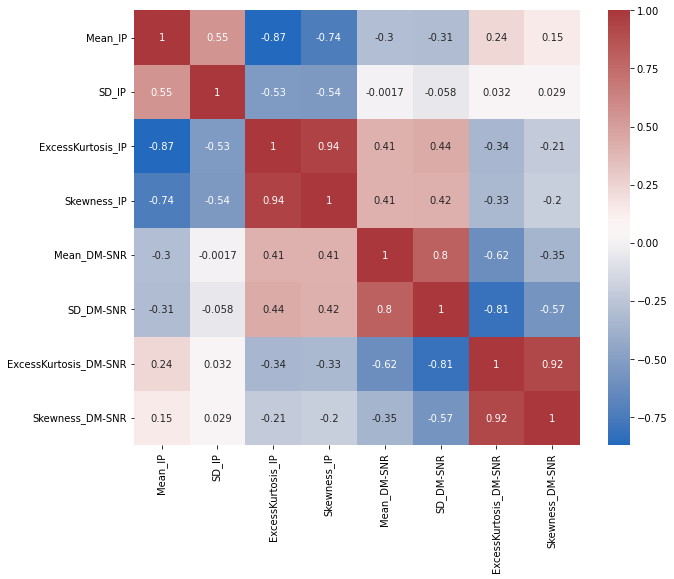

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(file[file.columns[:-1]].corr(), annot = True, cmap = 'vlag')
plt.show()

## Fixing null values by imputing medians
#### (We can also remove columns that contain null values if we find them to be highly correlated to other variables. This would prevent multicollinearity while ensuring that there is as little change as possible to the final set of variables that would be used to train the model.) 

### Basic statistics of the dataset before imputation

In [9]:
file.describe()

,Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DM-SNR,SD_DM-SNR,ExcessKurtosis_DM-SNR,Skewness_DM-SNR,TargetClass
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [10]:
for var in ['ExcessKurtosis_IP', 'SD_DM-SNR', 'Skewness_DM-SNR' ]:
    for i in range(len(file[var])):
        if pd.isnull(file[var][i]):
            file[var][i] = np.nanmedian(file[var])

### Basic statistics of the dataset after imputation

In [11]:
file.describe()

,Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DM-SNR,SD_DM-SNR,ExcessKurtosis_DM-SNR,Skewness_DM-SNR,TargetClass
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.443251,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.992144,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.421239,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [12]:
file.isnull().sum()

Mean_IP                  0
SD_IP                    0
ExcessKurtosis_IP        0
Skewness_IP              0
Mean_DM-SNR              0
SD_DM-SNR                0
ExcessKurtosis_DM-SNR    0
Skewness_DM-SNR          0
TargetClass              0
dtype: int64

#### There are no null values remaining

## Looking at the class division

0.0    11375
1.0     1153
Name: TargetClass, dtype: int64


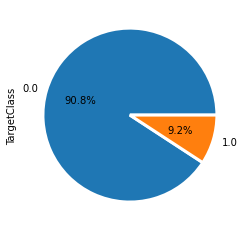

In [13]:
print(file['TargetClass'].value_counts())

file['TargetClass'].value_counts(normalize=True).plot.pie(wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%')
plt.show()

#### It is an imbalanced dataset.
#### To deal with an imbalanced dataset, we can use a confusion matrix to evaluate the model. We can also use the stratified k-fold cross validation technique. In this technique, it selects a sample of the data such that both class labels have equal representation.

## Checking for and dealing with outliers

### Using boxplots to check for outliers visually

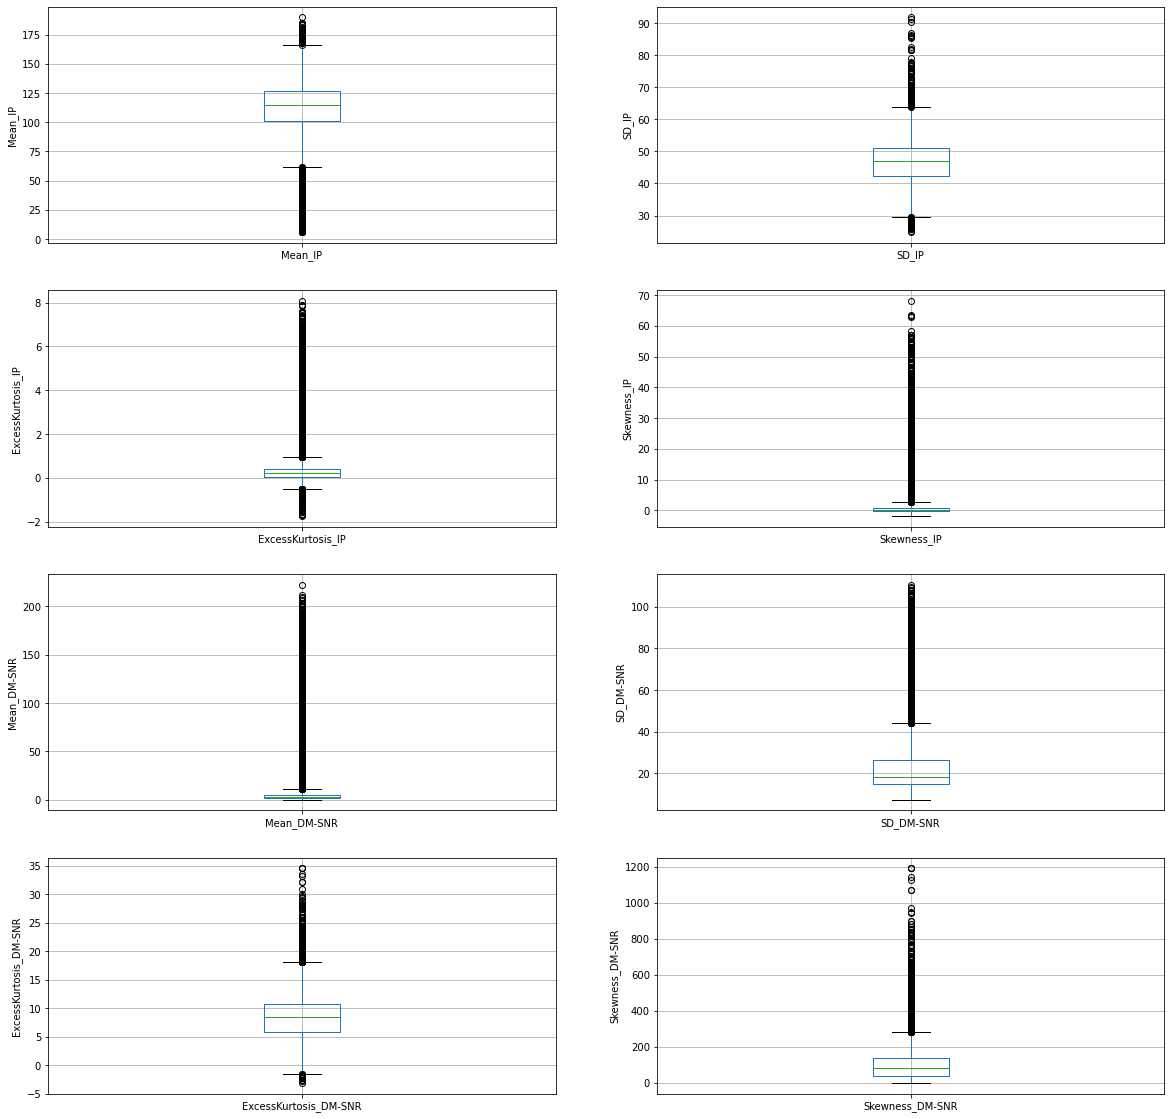

In [14]:
plt.figure(figsize=(20, 20))

for i in range(8):
    plt.subplot(4, 2, i+1)
    fig = file.boxplot(column = file.columns[i])
    fig.set_title('')
    fig.set_ylabel(file.columns[i])


#### Every variable has a lot of outliers.
#### In SVM, we deal with outliers by using a soft margin model, as the hard-margin model does not deal with outliers.
#### We try different c values when when we use the model. The higher the c value, the smaller the margin around the hyperplane, thus allowing for a smaller number of outliers, and vice versa. 

## Visualising the distribution of the variables

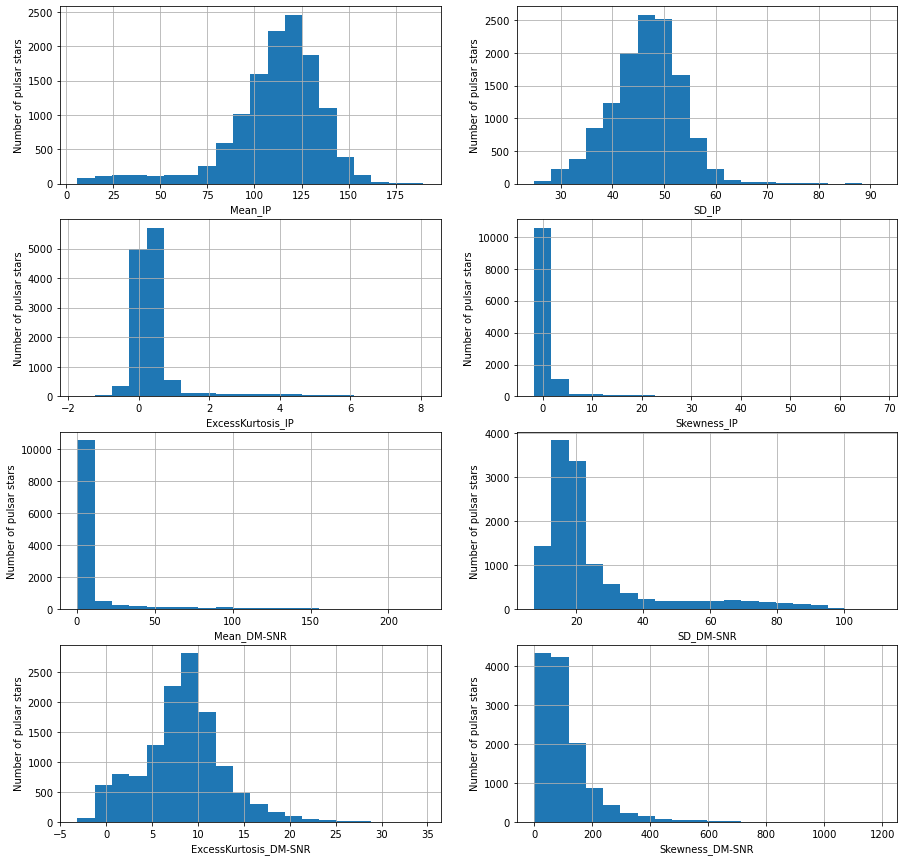

In [15]:
plt.figure(figsize=(15, 15))

for i in range(8):
    plt.subplot(4, 2, i+1)
    fig = file[file.columns[i]].hist(bins=20)
    fig.set_xlabel(file.columns[i])
    fig.set_ylabel('Number of pulsar stars')

#### All the independent variables are skewed.

## Visualising the relationship between variables and the distribution of the target class

### Using a pairplot

In [16]:
#sns.pairplot(file, hue = 'TargetClass', corner = True)
#plt.show()

### Using a correlation map

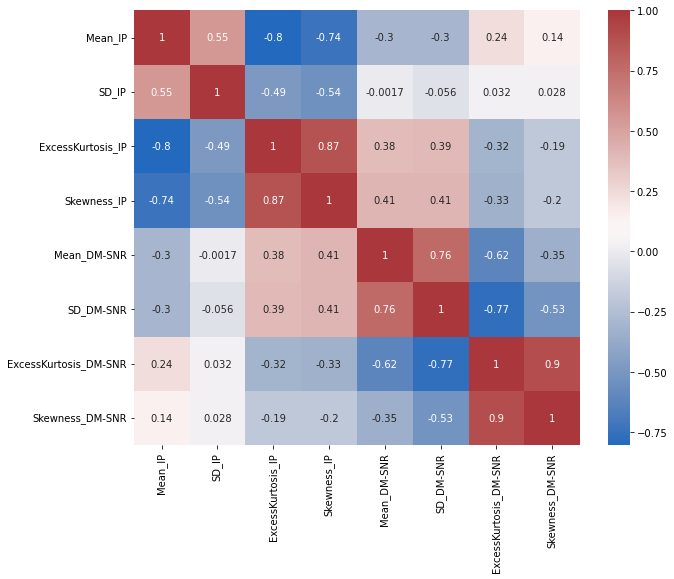

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(file[file.columns[:-1]].corr(), annot = True, cmap = 'vlag')
plt.show()

#### ExcessKurtosis_IP and Skewness_IP have a high correlation coefficient of 0.87 (0.94 before imputation). So we can drop one of the columns to avoid multicollinearity. ExcessKurtosis_IP and Mean_IP have a high correlation coefficient of -0.8 (-0.87 before imputation). As ExcessKurtosis_IP is common to both pairs and has the imputed values, we drop it.
#### SD_DM-SNR and Mean_DM-SNR have a high correlation coefficient of 0.76 (0.8 before imputation). SD_DM-SNR and ExcessKurtosis_DM-SNR have a high correlation coefficient of 0.77 (0.81 before imputation). Mean_DM-SNR and ExcessKurtosis_DM-SNR are not very highly correlated. We drop SD_DM-SNR, as it is common to both the former pairs, and it also contains imputed values.
#### Skewness_DM-SNR and ExcessKurtosis_DM-SNR are highly correlated, with a coefficient of 0.9 (0.92 before imputaion). We drop Skewness_DM-SNR, as it has imputed values.

#### As it turns out, the three columns which had null values in the beginning were all correlated with other columns, and were dropped to prevent multicollinearity. The null values therefore do not influence the final model.

### The variables that we would use in the final model would be:
    Mean_IP
    SD_IP
    Skewness_IP
    Mean_DM-SNR
    ExcessKurtosis_DM-SNR
    TargetClass

# Analysis

## Separating the dependent and independent variables

In [18]:
x = file[['Mean_IP','SD_IP', 'Skewness_IP', 'Mean_DM-SNR', 'ExcessKurtosis_DM-SNR']]

y = file['TargetClass']
#x
#y

## Train test split

In [19]:
from sklearn.model_selection import train_test_split

# Test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

## Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

# SVM

## With the default hyperparameters

In [21]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# print the confusion matrix
print(confusion_matrix(y_test, y_pred))

Model accuracy score with default hyperparameters: 0.9804
[[2303    4]
 [  45  154]]


## With rbf kernel and different c values

In [ ]:
svc = SVC(kernel = 'rbf')

## Checking which hyperparameters give the best accuracy

In [25]:
# kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
# cvalues = [1.0, 10.0, 100.0, 1000.0, 10000.0]
# kernelcolumn = []
# cvaluecolumn = []
# accuracycolumn = []
# for kernel in kernels:
#     for cvalue in cvalues:
#         svc = SVC(kernel = kernel, C= cvalue) 
#         svc.fit(x_train,y_train)
#         y_pred=svc.predict(x_test)
#         kernelcolumn.append(kernel)
#         cvaluecolumn.append(cvalue)
#         accuracycolumn.append((accuracy_score(y_test, y_pred)))

# print(kernelcolumn, '\n', cvaluecolumn, '\n', accuracycolumn)    



# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(C=10.0, kernel='poly'),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [26]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9775


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.1)


In [28]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.9800
